In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df = pd.read_excel('Du lieu tu vong.xls')
df

,Tuổi,Tử vong
0,18,0
1,18,0
2,18,0
3,18,0
4,18,0
...,...,...
21595,65,1
21596,65,1
21597,65,0
21598,65,1


In [19]:
df = df.rename(columns={'Tử vong': 'Death', 'Tuổi ': 'Age'})
df.describe()

,Age,Death
count,21600.000000,21600.000000
mean,34.755139,0.482315
std,10.386066,0.499699
min,18.000000,0.000000
25%,27.000000,0.000000
50%,32.000000,0.000000
75%,42.000000,1.000000
max,65.000000,1.000000


__dataframe__ chứa các cột: Age, NoSample, NoDeath, DeathRate

In [43]:
dataframe = pd.DataFrame(columns=['NoSample', 'NoDeath', 'DeathRate'])

In [45]:
dataframe['DeathRate'] = df.groupby('Age').agg({'Death': 'mean'})
dataframe['NoSample'] = df.groupby('Age').agg({'Death': 'count'})
dataframe['NoDeath'] = df.groupby('Age').agg({'Death': 'sum'})
dataframe

,NoSample,NoDeath,DeathRate
Age,,,
18,72,22,0.305556
19,84,11,0.130952
20,472,225,0.476695
21,489,193,0.394683
22,487,194,0.398357
23,493,192,0.389452
24,446,121,0.271300
25,1210,625,0.516529
26,1108,528,0.476534


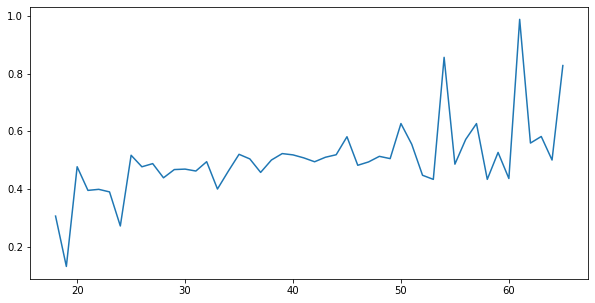

In [46]:
plt.figure(figsize=(10,5))
plt.plot(dataframe['DeathRate'])
plt.show()

Tạo một ma trận trung bình các khoảng

In [47]:
dataframe.index

Int64Index([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
            52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65],
           dtype='int64', name='Age')

death_rate_matrix --> drmatrix

In [49]:
drmatrix = pd.DataFrame(columns=dataframe.index)

In [67]:
no_index_df = dataframe.reset_index(drop=True)
no_index_df

,NoSample,NoDeath,DeathRate
0,72,22,0.305556
1,84,11,0.130952
2,472,225,0.476695
3,489,193,0.394683
4,487,194,0.398357
5,493,192,0.389452
6,446,121,0.271300
7,1210,625,0.516529
8,1108,528,0.476534
9,1202,586,0.487521


In [102]:
no_sample = sum(dataframe['NoSample'])
no_sample

21600

In [104]:
def create_death_rate_matrix(dataframe):
    drmatrix = np.zeros((len(dataframe), len(dataframe)))
    for idx_row in range(len(dataframe)):
        for idx_col in range(len(dataframe)):
            if idx_row > idx_col:
                drmatrix[idx_row, idx_col] = 0
            elif idx_row == idx_col:
                drmatrix[idx_row, idx_col] = dataframe.loc[idx_row, 'DeathRate']
            else:
                drmatrix[idx_row, idx_col] = sum(dataframe['NoDeath'][idx_row:idx_col+1]) / sum(dataframe['NoSample'][idx_row:idx_col+1])
                if sum(dataframe['NoSample'][idx_row:idx_col+1]) / no_sample > 0.5:
                    drmatrix[idx_row, idx_col] = 0
    return drmatrix

In [105]:
drmatrix = create_death_rate_matrix(no_index_df)

In [106]:
dr_dataframe = pd.DataFrame(drmatrix)
dr_dataframe

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,0.305556,0.211538,0.410828,0.403760,0.402120,0.399142,0.376720,0.421796,0.434273,0.444829,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.130952,0.424460,0.410526,0.406658,0.402469,0.378794,0.424070,0.436208,0.446503,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.476695,0.434964,0.422652,0.414219,0.387516,0.430915,0.441658,0.450990,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.394683,0.396516,0.394146,0.365535,0.424000,0.437751,0.448758,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.398357,0.393878,0.355540,0.429439,0.443376,0.454104,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.389452,0.333333,0.436482,0.450107,0.460193,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.271300,0.450483,0.460926,0.468986,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.516529,0.497412,0.494034,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.476534,0.482251,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.487521,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Tìm path dựa trên ma trận trên

In [107]:
# input is drmatrix
def find_path(DRdf):
    result = (0, 0, 0, 0)
    length = len(DRdf)
    max_score = 0
    for i in range(1, length-1):
        for j in range(i+1, length-1):
            for m in range(j+1, length-1):
                for n in range(m+1, length-1):
                    x1 = DRdf[0, i]
                    x2 = DRdf[i, j]
                    x3 = DRdf[j, m]
                    x4 = DRdf[m, n]
                    x5 = DRdf[n, length-1]
                    if x1 == 0 or x2 == 0 or x3 == 0 or x4 == 0 or x5 == 0:
                        continue
                    score = (x2 - x1) + (x3 - x2) + (x4 - x3) + (x5 - x4)
                    if score > max_score:
                        max_score = score
                        result = (i, j, m, n)
    return result

In [108]:
path = find_path(drmatrix)
path

(1, 5, 14, 43)

In [109]:
age_set = np.array(dataframe.index.to_list())
print(age_set)
age_set[np.array(path)]

[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65]


array([19, 23, 32, 61])

Câu trả lời: (18, 19) (20, 23), (24, 32), (33, 61), (62, 65)